# Importing the Dependencies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as px

In [6]:
trump_reviews = pd.read_csv("Trump.csv")
biden_reviews = pd.read_csv("Biden.csv")

In [9]:
trump_reviews.head(3)

,user,text
0,manny_rosen,@sanofi please tell us how many shares the Cr...
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P..."
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...


In [11]:
biden_reviews.head(3)

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...
2,OldlaceA,@JoeBiden So did Lying Barr


# Sentiment Analysis

Now, for sentiment analysis, we will be using the Textblob package in Python. Here I will use this package to perform simple text classification in either positive or negative on the basis of sentiment analysis:

1 Polarity refers to the sentiment or emotion expressed in the text, ranging from negative to positive. If polarity > 0, then it is a positive comment, else if it's polarity<0 then it is negative comment else it is neutral i.e, polarity=0. 

2 Subjectivity, suggests that the text contains some subjects or opinions, measures the extent to which the text is subjective or opinionated rather than objective

In [12]:
textblob1 = TextBlob(trump_reviews['text'][10])
textblob1.sentiment
textblob2 = TextBlob(biden_reviews['text'][500])
textblob2.sentiment

Sentiment(polarity=0.6, subjectivity=0.9)

In [13]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

In [14]:
trump_reviews["Sentiment Polarity"] = trump_reviews["text"].apply(find_pol)
biden_reviews["Sentiment Polarity"] = biden_reviews["text"].apply(find_pol)

In [15]:
trump_reviews.head(3)

,user,text,Sentiment Polarity
0,manny_rosen,@sanofi please tell us how many shares the Cr...,0.05
1,osi_abdul,"https://t.co/atM98CpqF7 Like, comment, RT #P...",0.00
2,Patsyrw,Your AG Barr is as useless &amp; corrupt as y...,-0.50


In [17]:
biden_reviews.head(3)

,user,text,Sentiment Polarity
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...,0.0
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...,0.0
2,OldlaceA,@JoeBiden So did Lying Barr,0.0


# Sentiment Polarity on both the candidates:

In [20]:
trump_reviews["Expression Label"] = np.where(trump_reviews["Sentiment Polarity"]>0, "positive", "negative")
trump_reviews.loc[trump_reviews["Sentiment Polarity"] == 0, "Expression Label"] = "Neutral"

print(trump_reviews.tail())

biden_reviews["Expression Label"] = np.where(biden_reviews["Sentiment Polarity"]>0, "positive", "negative")
biden_reviews.loc[biden_reviews["Sentiment Polarity"] == 0, "Expression Label"] = "Neutral"
print(biden_reviews.tail())

                 user                                               text  \
2783          4diva63  @realDonaldTrump For the 1/100 time, absentee ...   
2784         hidge826  @realDonaldTrump If you’re so scared of losing...   
2785     SpencerRossy  @realDonaldTrump I rarely get involved with fo...   
2786  ScoobyMcpherson  @realDonaldTrump This is the moment when Trump...   
2787          bjklinz     @realDonaldTrump I’m sorry, Donald. No. #POTUS   

      Sentiment Polarity Expression Label  
2783               0.000          Neutral  
2784               0.000          Neutral  
2785               0.225         positive  
2786               0.000          Neutral  
2787              -0.500         negative  
             user                                               text  \
2535    meryn1977  @JoeBiden You'll just try to calm those waters...   
2536  BSNelson114  @JoeBiden 96 days 96 dias #VoteJoeBiden2020  #...   
2537     KenCapel  @JoeBiden YOU THINK YOU CAN DO THAT??? YOU C

# Drop all the tweets with neutral polarity

In [21]:
reviews1 = trump_reviews[trump_reviews['Sentiment Polarity'] == 0.0000] # Filter reviews where Sentiment Polarity is exactly 0.0000 (neutral reviews)
print(reviews1.shape)

cond1=trump_reviews['Sentiment Polarity'].isin(reviews1['Sentiment Polarity']) # Create a boolean condition to identify rows in the original dataframe
# that have Sentiment Polarity values found in reviews1 (i.e., 0.0000)
trump_reviews.drop(trump_reviews[cond1].index, inplace = True)
print(trump_reviews.shape)

(1464, 4)
(1324, 4)


In [22]:
reviews2 = biden_reviews[biden_reviews['Sentiment Polarity'] == 0.0000]
print(reviews2.shape)

cond2=biden_reviews['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
biden_reviews.drop(biden_reviews[cond2].index, inplace = True)
print(biden_reviews.shape)

(1509, 4)
(1031, 4)


# Balance the datasets

In [23]:
# Donald Trump
np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(trump_reviews.index, remove_n, replace=False)
df_subset_trump = trump_reviews.drop(drop_indices)
print(df_subset_trump.shape)

# Joe Biden
np.random.seed(10)
remove_n =31
drop_indices = np.random.choice(biden_reviews.index, remove_n, replace=False)
df_subset_biden = biden_reviews.drop(drop_indices)
print(df_subset_biden.shape)

(1000, 4)
(1000, 4)


# Predict the US Elections, by analyzing the number of positive and negative sentiments in both the accounts:

In [26]:
count_1 = df_subset_trump.groupby('Expression Label')['Sentiment Polarity'].count()
percent_1 = (count_1 / count_1.sum()) * 100
print(percent_1)

count_2 = df_subset_biden.groupby('Expression Label')['Sentiment Polarity'].count()
percent_2 = (count_2 / count_2.sum()) * 100
print(percent_2)

Expression Label
negative    44.9
positive    55.1
Name: Sentiment Polarity, dtype: float64
Expression Label
negative    39.3
positive    60.7
Name: Sentiment Polarity, dtype: float64


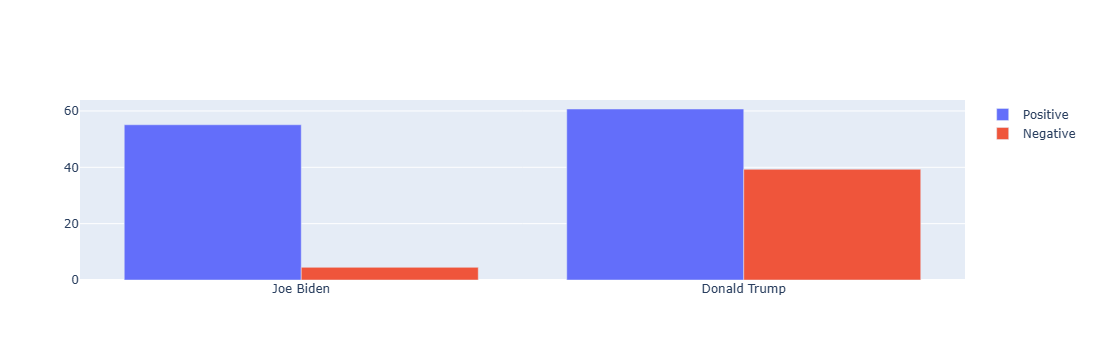

In [27]:
Politicians = ['Joe Biden', 'Donald Trump']
lis_pos = [positive_per1, positive_per2]
lis_neg = [negative_per1, negative_per2]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=Politicians, y=lis_pos),
    go.Bar(name='Negative', x=Politicians, y=lis_neg)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()